![alt text](Task.JPG "Задание")

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative

In [40]:
class DiffusionEquation:
    def __init__(self, D = 0 , T = 0, L= 0, Nx = 0, Nt = 0) -> None:
        self.T = T #T max
        self.L = L # длина пластины
        self.D = D
        self.Nx = Nx # количество сэмплов по x
        self.Nt = Nt # количество сэмплов по  t
        self.map = np.zeros((Nt, Nx))
    
    def set_boundary_conditions(self):
        for i in range(self.Nt):
            self.map[i][0] = 0
            self.map[i][self.Nx - 1] = 0
        for i in range(self.Nx):
            x = self.L * i / (self.Nx - 1.)
            self.map[0][i] = x * (1 - x / self.L)

def fill_right_side(equation, a, right_side, t):
    right_side[0] = 0
    for i in range(equation.Nx - 2):
        right_side[i + 1] = a * equation.map[t][i] + 2 * (1 - a) * equation.map[t][i+1] + a * equation.map[t][i + 2]
    right_side[equation.Nx - 1] = 0 

def gauss_elimination(Nx, eliminated, right_side):
    result = np.zeros((Nx))
    for i in range(Nx):
        id = Nx - 1 - i
        dot = 0
        for j in range(Nx):
            dot += result[j] * eliminated[id][j]
        result[id] = (right_side[id] - dot) / eliminated[id][id]
    return result

def solve_Crank_Nicolson(equation):
    h = equation.L / (equation.Nx - 1)
    dt = equation.T / (equation.Nt - 1)
    a = dt * equation.D / (h * h)
    matr = np.zeros((equation.Nx, equation.Nx))
    # Filling matr
    mElement = 2 * (1 + a)
    sElement = -a
    for i in range(equation.Nx):
        matr[i, i] = mElement
    i = 1
    while i < equation.Nx - 1:
        matr[i, i - 1] = sElement
        matr[i, i + 1] = sElement
        i+=1
    matr[0][0] = 1.
    matr[equation.Nx - 1, equation.Nx - 1] = 1.
    #
    eliminated = np.copy(matr)

    ratios = list()
    for i in range(equation.Nx - 2):
        ratio = eliminated[i + 1][i] / eliminated[i][i]
        ratios.append(ratio)
        for j in range(equation.Nx):
            eliminated[i + 1][j] = eliminated[i + 1][j] - eliminated[i][j] * ratio

    right_side = np.zeros((equation.Nx))

    for i in range(equation.Nt - 1):
        fill_right_side(equation, a, right_side, i)
        for j in range(equation.Nx - 2):
            right_side[j + 1] = right_side[j + 1] - right_side[j] * ratios[j]
        next = gauss_elimination(equation.Nx, eliminated, right_side)
        for j in range(equation.Nx):
            equation.map[i + 1][j] = next[j]
    fill_right_side(equation, a, right_side, 0)

In [41]:
# выставляем начальные значения констант и размер системы
equation = DiffusionEquation(0.6, 0.5, 1, 100, 100)
# устанавливаем гран условия
equation.set_boundary_conditions()

In [42]:
solve_Crank_Nicolson(equation)

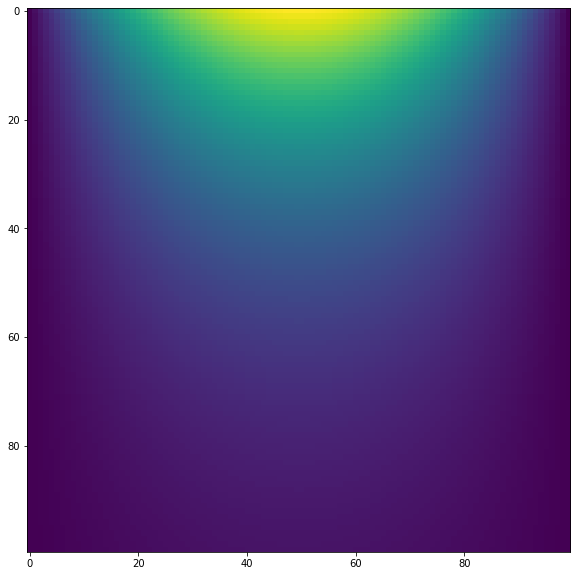

In [43]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 10]
im = ax.imshow(equation.map)

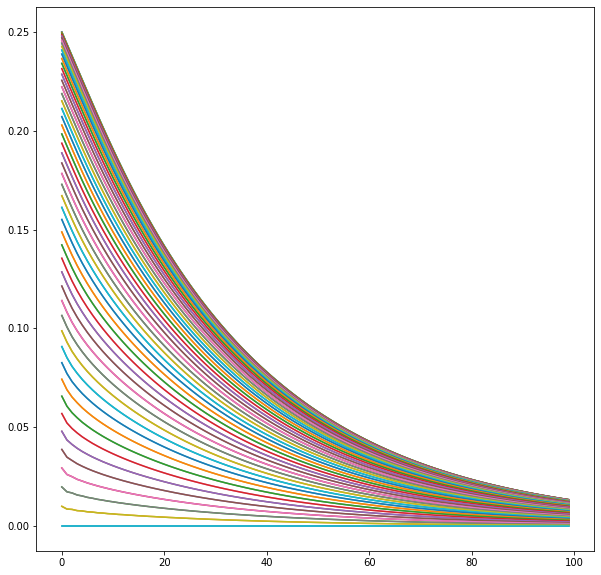

In [44]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 10]
ax.plot(equation.map)